In [1]:
from manim import *

from selma import BACKGROUND
from selma.graph import *
from selma.datastructures import *
import networkx as nx

config.background_color = BACKGROUND

In [2]:
import re

corpus = """
Twinkle twinkle, little star,
How I wonder what you are!
Up above the world so high,
Like a diamond in the sky.
"""

corpus = """
This text is short. 
This is a short text. 
A short text is a simple example. 
This simple text is short. 
This short example is just a text.
"""

res = []
words_list = re.findall(r'\b\w+\b', corpus.lower())
edges_list = list((s, t) for s, t in zip(words_list, words_list[1:]))
edges = set(edges_list)
words = set(words_list)

In [3]:
G = nx.DiGraph()
for s, t in edges:
  G.add_edge(s, t)

In [4]:
layout = gvlayout_factory('fdp', heightscale=0.6)

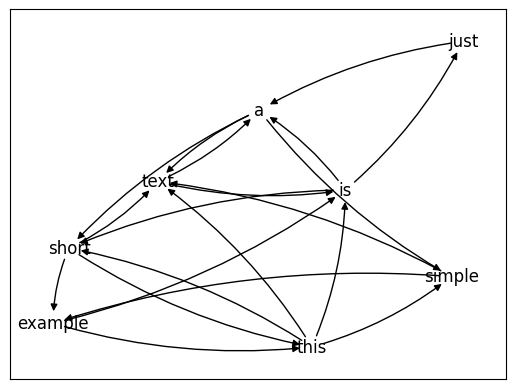

In [5]:
test_draw(G, layout)

In [ ]:
%%manim --renderer=opengl --hide-splash -pqm -v WARNING BFS

class BFS(Scene):
  def construct(self):
    Q = MQueue()
    self.add(Q.rect.scale(.8).to_edge(UP))
    MG = MGraph(G, layout)
    MG.scale(.8)
    MG.shift(DOWN/2)
    self.add(MG.medges, MG.mnodes)
    
    seen = set(['this'])
    dot = Dot(color = YELLOW)
    self.play(Q.enqueue(MG.mnode('this').copy()))
    MG.mnode('this').set(stroke_color = ORANGE)
    while Q.queue:
      e = Q.queue[-1][1].text
      self.play(Q.dequeue())
      MG.mnode(e).set(stroke_color = YELLOW)
      for t in G.neighbors(e):
        self.play(MG.movealong(dot, e, t))
        if t in seen: continue
        print(e, t)
        seen.add(t)
        MG.mnode(t).set(stroke_color = RED)
        self.play(Q.enqueue(MG.mnode(t).copy()))
      MG.mnode(e).set(stroke_color = GREEN)
        
    #dot = Dot()
    #MG.movealong(dot, 'just', 'a').play(self)
    
    
    #self.play(MG.medge('this', 'is').copy().animate.set_stroke(width=5), run_time=0.3)
    
    #Q.enqueue(MG.mnode('this').copy()).play(self)
    
    # self.add(MG.mnode('this')[1].set_fill(color=ORANGE, opacity=.4))
    # for edge in G.out_edges('this'):
    #   self.add(MG.medge(*edge).set_color(ORANGE))
      
      
      
    # w = {(s,t): 1 for s, t in G.edges}
    # for s, t in G.edges:
    #   e = MG.medge(s, t).copy()
    #   dot = Dot(MG.mnode(s).get_center(), color=YELLOW)
    #   self.play(MoveAlongPath(dot, e, run_time=0.3))
    #   self.remove(dot)
    #   w[(s, t)] += 2
    #   self.play(Indicate(MG.mnode(t)), e.animate.set_stroke(width=w[(s, t)]), run_time=0.3)
    
    self.wait(10)

this is


this short


this simple


this text


is a


is just


short example


Animation 22: MoveAlongPath(Dot):  13%|█▎        | 4/30 [00:00<00:00, 38.42it/s]      

In [ ]:
%%manim --renderer=opengl --hide-splash -pqh -v WARNING DFS

class DFS(Scene):
  def construct(self):
    S = MStack()
    self.add(S.rect.scale(.8).to_edge(UP))
    MG = MGraph(G, layout)
    MG.scale(.8)
    MG.shift(DOWN/2)
    self.add(MG.mnodes)
    self.add(MG.medges)
     
    seen = set(['this'])
    dot = Dot(color = YELLOW)
    self.play(S.push(MG.mnode('this').copy()))
    MG.mnode('this').set(stroke_color = ORANGE)
    while S.stack:
      e = S.stack[-1][1].text
      self.play(S.pop())
      MG.mnode(e).set(stroke_color = YELLOW)
      for t in G.neighbors(e):
        self.play(MG.movealong(dot, e, t))
        if t in seen: continue
        print(e, t)
        seen.add(t)
        self.play(S.push(MG.mnode(t).copy()))
        MG.mnode(t).set(stroke_color = RED)
        #S.push(MG.medge(e, t).copy()).play(self)
      MG.mnode(e).set(stroke_color = GREEN)
        
    #dot = Dot()
    #MG.movealong(dot, 'just', 'a').play(self)
    
    
    #self.play(MG.medge('this', 'is').copy().animate.set_stroke(width=5), run_time=0.3)
    
    #S.push(MG.mnode('this').copy()).play(self)
    
    # self.add(MG.mnode('this')[1].set_fill(color=ORANGE, opacity=.4))
    # for edge in G.out_edges('this'):
    #   self.add(MG.medge(*edge).set_color(ORANGE))
      
      
      
    # w = {(s,t): 1 for s, t in G.edges}
    # for s, t in G.edges:
    #   e = MG.medge(s, t).copy()
    #   dot = Dot(MG.mnode(s).get_center(), color=YELLOW)
    #   self.play(MoveAlongPath(dot, e, run_time=0.3))
    #   self.remove(dot)
    #   w[(s, t)] += 2
    #   self.play(Indicate(MG.mnode(t)), e.animate.set_stroke(width=w[(s, t)]), run_time=0.3)
    self.wait(10)

In [ ]:
S = MStack()
S.push(Text('a'))
S.push(Text('b'))
S.stack

In [ ]:
Q = MQueue()
Q.enqueue(Text('a'))
Q.enqueue(Text('b'))
Q.queue